### Import necessary packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.model_selection import train_test_split 
import warnings
import pickle


In [2]:
youtube_df = pd.read_csv('youtubers_df.csv')

In [3]:
youtube_df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [4]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [5]:
youtube_df.shape

(1000, 9)

In [6]:
youtube_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,1000.0,5.005000e+02,2.888194e+02,1.0,250.75,500.5,750.25,1000.0
Suscribers,1000.0,2.189440e+07,1.682775e+07,11700000.0,13800000.00,16750000.0,23700000.00,249500000.0
Visits,1000.0,1.209446e+06,5.229942e+06,0.0,31975.00,174450.0,865475.00,117400000.0
Likes,1000.0,5.363259e+04,2.580457e+05,0.0,471.75,3500.0,28650.00,5300000.0
Comments,1000.0,1.288768e+03,6.778188e+03,0.0,2.00,67.0,472.00,154000.0


In [7]:
youtube_df.isna().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [8]:
youtube_df.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

### Individual insppection of unique values of columns 

In [9]:
youtube_df['Rank'].unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [10]:
youtube_df['Categories'].unique()

array(['Música y baile', 'Videojuegos, Humor', 'Educación', nan,
       'Animación, Juguetes', 'Películas, Videojuegos', 'Juguetes',
       'Videojuegos', 'Películas, Animación', 'Películas',
       'Noticias y Política', 'Animación, Humor',
       'Música y baile, Animación', 'Música y baile, Películas',
       'Películas, Juguetes', 'Películas, Humor', 'Vlogs diarios',
       'Videojuegos, Juguetes', 'Animación, Videojuegos', 'Animación',
       'Música y baile, Humor', 'Diseño/arte, DIY y Life Hacks',
       'Ciencia y tecnología', 'Fitness, Salud y autoayuda',
       'Belleza, Moda', 'Humor', 'Comida y bebida', 'Deportes', 'Fitness',
       'Viajes, Espectáculos', 'Comida y bebida, Salud y autoayuda',
       'Diseño/arte', 'DIY y Life Hacks, Juguetes', 'Educación, Juguetes',
       'Juguetes, Coches y vehículos', 'Música y baile, Juguetes',
       'Animales y mascotas', 'ASMR', 'Moda', 'DIY y Life Hacks',
       'Diseño/arte, Belleza', 'Coches y vehículos',
       'Animación, Humor

In [11]:
youtube_df['Suscribers'].unique()

array([2.495e+08, 1.835e+08, 1.655e+08, 1.626e+08, 1.135e+08, 1.115e+08,
       1.075e+08, 1.014e+08, 9.970e+07, 9.720e+07, 9.130e+07, 8.970e+07,
       8.540e+07, 8.030e+07, 7.650e+07, 7.270e+07, 7.250e+07, 6.960e+07,
       6.750e+07, 6.660e+07, 6.640e+07, 6.260e+07, 6.090e+07, 5.990e+07,
       5.970e+07, 5.890e+07, 5.870e+07, 5.790e+07, 5.670e+07, 5.570e+07,
       5.480e+07, 5.410e+07, 5.370e+07, 5.310e+07, 5.290e+07, 4.880e+07,
       4.860e+07, 4.810e+07, 4.750e+07, 4.730e+07, 4.700e+07, 4.640e+07,
       4.600e+07, 4.590e+07, 4.560e+07, 4.500e+07, 4.460e+07, 4.440e+07,
       4.420e+07, 4.400e+07, 4.370e+07, 4.340e+07, 4.290e+07, 4.250e+07,
       4.210e+07, 4.110e+07, 4.100e+07, 4.060e+07, 4.030e+07, 4.010e+07,
       3.990e+07, 3.960e+07, 3.950e+07, 3.940e+07, 3.930e+07, 3.910e+07,
       3.870e+07, 3.830e+07, 3.810e+07, 3.770e+07, 3.750e+07, 3.740e+07,
       3.730e+07, 3.700e+07, 3.690e+07, 3.680e+07, 3.670e+07, 3.660e+07,
       3.650e+07, 3.630e+07, 3.570e+07, 3.560e+07, 

In [12]:
youtube_df['Country'].unique()

array(['India', 'Estados Unidos', 'Unknown', 'Brasil', 'México', 'Rusia',
       'Pakistán', 'Filipinas', 'Indonesia', 'Tailandia', 'Francia',
       'Colombia', 'Iraq', 'Japón', 'Ecuador', 'Argentina', 'Turquía',
       'Arabia Saudita', 'El Salvador', 'Bangladesh', 'Reino Unido',
       'Argelia', 'España', 'Perú', 'Egipto', 'Jordania', 'Marruecos',
       'Singapur', 'Somalia'], dtype=object)

In [13]:
youtube_df['Visits'].unique()

array([8.620e+04, 1.174e+08, 7.000e+06, 1.560e+04, 3.900e+06, 2.400e+06,
       2.600e+06, 4.100e+06, 7.430e+04, 1.845e+05, 8.632e+05, 3.460e+04,
       3.550e+04, 1.646e+05, 9.697e+05, 4.407e+05, 7.300e+03, 5.064e+05,
       6.521e+05, 3.040e+04, 1.470e+04, 3.300e+04, 2.490e+04, 8.020e+04,
       1.660e+04, 3.930e+05, 5.300e+06, 7.600e+03, 3.660e+04, 2.630e+04,
       1.459e+05, 6.030e+04, 1.200e+06, 5.956e+05, 4.300e+06, 1.442e+05,
       1.600e+06, 1.100e+06, 2.260e+04, 2.000e+06, 2.081e+05, 5.570e+04,
       9.700e+06, 6.800e+03, 1.100e+04, 5.409e+05, 2.000e+04, 8.506e+05,
       6.100e+03, 6.657e+05, 2.270e+04, 1.014e+05, 1.021e+05, 1.746e+05,
       6.645e+05, 1.247e+05, 8.562e+05, 2.200e+06, 2.110e+04, 9.722e+05,
       3.260e+04, 2.500e+06, 9.900e+04, 5.855e+05, 0.000e+00, 5.886e+05,
       6.484e+05, 1.300e+06, 2.257e+05, 2.180e+04, 6.200e+03, 1.203e+05,
       1.600e+02, 2.880e+04, 8.906e+05, 2.600e+04, 8.280e+04, 4.038e+05,
       4.800e+03, 2.400e+03, 1.700e+06, 1.012e+05, 

In [14]:
youtube_df['Likes'].unique()

array([2.700e+03, 5.300e+06, 2.470e+04, 1.660e+02, 1.240e+04, 1.973e+05,
       2.800e+04, 2.210e+04, 2.600e+03, 6.300e+03, 1.469e+05, 4.210e+02,
       6.150e+02, 7.030e+02, 1.803e+05, 2.390e+04, 1.440e+02, 3.970e+02,
       1.780e+04, 1.100e+03, 4.130e+02, 3.920e+02, 9.830e+02, 9.350e+02,
       2.310e+02, 1.565e+05, 2.290e+02, 7.920e+02, 9.640e+02, 8.900e+03,
       2.100e+03, 3.470e+04, 3.004e+05, 1.020e+04, 0.000e+00, 8.580e+04,
       1.630e+02, 1.171e+05, 2.720e+04, 3.290e+02, 6.640e+02, 3.304e+05,
       2.600e+02, 2.990e+02, 3.400e+03, 2.420e+02, 8.210e+04, 1.800e+02,
       3.980e+04, 4.300e+02, 7.500e+03, 8.200e+03, 3.570e+04, 5.700e+03,
       1.834e+05, 4.600e+03, 2.400e+03, 2.713e+05, 9.940e+02, 1.289e+05,
       1.840e+02, 4.800e+03, 1.310e+04, 1.010e+04, 7.350e+04, 2.850e+04,
       2.550e+02, 1.570e+02, 3.000e+00, 2.110e+02, 5.730e+04, 4.330e+02,
       6.500e+03, 1.800e+03, 1.220e+02, 5.900e+01, 1.080e+04, 2.010e+04,
       1.850e+02, 2.750e+04, 5.410e+04, 5.200e+03, 

In [15]:
youtube_df['Comments'].unique()

array([7.80e+01, 1.85e+04, 0.00e+00, 9.00e+00, 4.90e+03, 3.20e+01,
       2.14e+02, 3.40e+03, 1.30e+01, 2.10e+01, 3.50e+01, 7.40e+03,
       9.32e+02, 1.00e+00, 4.00e+00, 3.00e+00, 1.80e+01, 2.20e+01,
       4.20e+03, 5.40e+01, 1.67e+02, 3.30e+01, 1.50e+04, 3.45e+02,
       3.80e+03, 7.00e+00, 3.00e+03, 4.76e+02, 2.80e+01, 2.20e+04,
       2.00e+00, 1.10e+03, 5.93e+02, 1.77e+02, 2.10e+02, 1.54e+02,
       2.05e+02, 1.80e+03, 3.00e+01, 1.60e+04, 1.60e+03, 2.90e+03,
       2.36e+02, 1.23e+02, 3.64e+02, 3.63e+02, 1.00e+01, 2.60e+01,
       3.57e+02, 8.00e+00, 7.60e+01, 1.65e+04, 2.70e+01, 5.41e+02,
       6.00e+00, 6.00e+01, 2.10e+03, 2.09e+02, 1.36e+02, 1.98e+02,
       1.65e+02, 1.83e+02, 5.00e+00, 5.04e+02, 1.14e+04, 2.60e+04,
       3.86e+02, 7.30e+01, 2.90e+01, 1.53e+02, 5.05e+02, 1.70e+04,
       1.90e+04, 6.70e+01, 8.87e+02, 1.16e+04, 1.16e+02, 7.04e+02,
       2.17e+02, 1.08e+02, 8.38e+02, 2.30e+03, 4.85e+02, 3.09e+02,
       8.28e+04, 4.89e+02, 4.28e+02, 2.75e+02, 3.40e+01, 1.40e

In [16]:
youtube_df['Links'].unique()

array(['http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy4_brA',
       'http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8uQQuVA',
       'http://youtube.com/channel/UCbCmjCuTUZos6Inko4u57UQ',
       'http://youtube.com/channel/UCpEhnqL0y41EpW2TvWAHD7Q',
       'http://youtube.com/channel/UCk8GzjMOrta8yxDcKfylJYw',
       'http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_AJ5Yw',
       'http://youtube.com/channel/UCJplp5SjeGSdVdwsfb9Q7lQ',
       'http://youtube.com/channel/UCvlE5gTbOvjiolFlEm-c_Ow',
       'http://youtube.com/channel/UCFFbwnve3yF62-tVXkTyHqg',
       'http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D3XoAg',
       'http://youtube.com/channel/UCOmHUn--16B90oW2L6FRR3A',
       'http://youtube.com/channel/UCyoXW-Dse7fURq30EWl_CUA',
       'http://youtube.com/channel/UC6-F5tO8uklgE9Zy8IvbdFw',
       'http://youtube.com/channel/UC295-Dw_tDNtZXFeAPAW6Aw',
       'http://youtube.com/channel/UCLkAepWjdylmXSltofFvsYQ',
       'http://youtube.com/channel/UC3IZKseVpdzPSBaWxBxundA',
       '

#### Handle null values in 'Categories' columns 

In [17]:
## since it is a categorical cariable, we fillna using the mode.

youtube_df.fillna(youtube_df['Categories'].mode()[0], inplace = True)

In [18]:
youtube_df['Categories'].isna().sum()

0

#### Outlier check

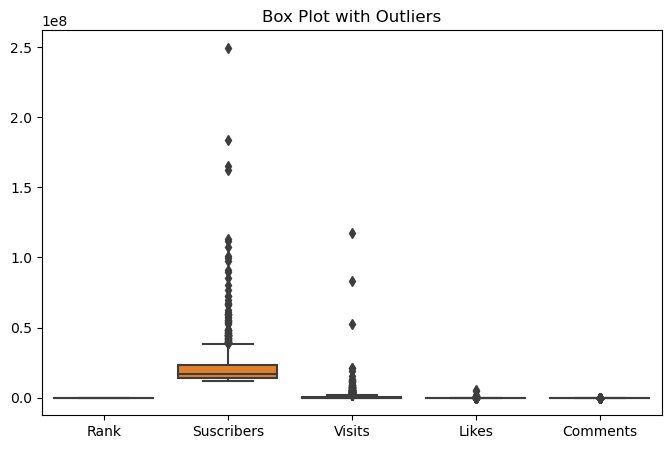

In [19]:
# Create a box plot with outliers highlighted
plt.figure(figsize=(8, 5))
sns.boxplot(data=youtube_df, showfliers=True)
plt.title('Box Plot with Outliers')
plt.show()

From the box plot above, it can be seen that the subsciber and visits columns have some outliers. This could be attested to the fact that some content creators perfomed exceptionally in the survey and had very high numbers of subscribers and visits comapaed to the others. 

In [20]:
youtube_df.Suscribers.skew()

5.950671123448034

In [22]:
youtube_df.Likes.skew()

16.15057911462324

In [23]:
youtube_df.Visits.skew()

16.091152111070716

In [25]:
## the above figures show that this dataset is highly positively skewed

### Visualization of categories

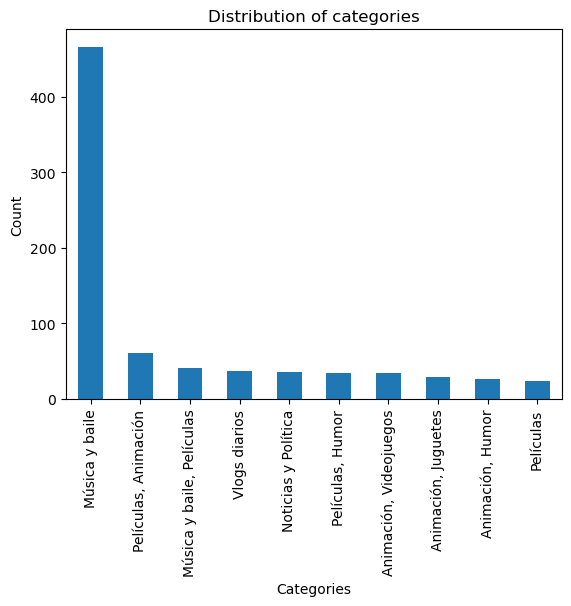

In [24]:
# using a barplot to show the distribution of our categories
category_count = youtube_df['Categories'].value_counts()
category_count_sliced = category_count[:10] ## plot only top 10 categories
category_count_sliced.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of categories')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

plt.show()

#### Popular categories 
From the chart above which shows the top 10 categories with highest views, it can be seen that most popular category loved by users is the 'Musica y Baile' category (which means 'Music and Dance' in English). 

In [26]:
youtube_df.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [27]:
youtube_df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Música y baile,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


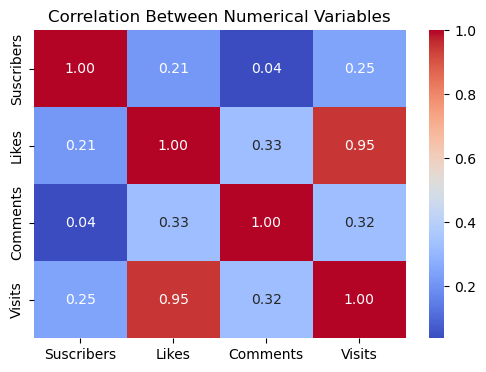

In [28]:
## heatmap showing relationship between subscribers, comments and likes 
heat_df = youtube_df[['Suscribers', 'Likes', 'Comments', 'Visits']]
# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heat_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Adding title
plt.title('Correlation Between Numerical Variables')

# Display the plot
plt.show()


### Corrrelation between the Numerical Variables 
From the heatmap above, the likes and visits column show high level of positive correlation, the higher the visits the higher the likes. While others od not. 

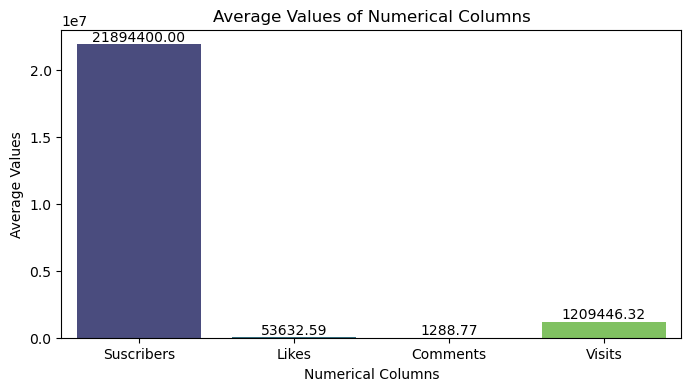

In [29]:
# Calculate the average of numerical columns
average_values = heat_df.mean()

# Plotting the bar chart
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x=average_values.index, y=average_values.values, palette='viridis')

# Adding labels and title
plt.xlabel('Numerical Columns')
plt.ylabel('Average Values')
plt.title('Average Values of Numerical Columns')

# Adding values on top of the bars
for index, value in enumerate(average_values):
    bar_plot.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=10)


# Display the plot
plt.show()


In [30]:
## normalize the numerical columns 
def normalize_df(df):
    """Normalize the columns in a DataFrame."""
    for col in df.columns:
        if df[col].dtype != 'object':
            df[col] = df[col] / df[col].max()
    return df

df_normalized = normalize_df(youtube_df.copy())

In [31]:
df_normalized.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,0.001,tseries,Música y baile,1.000000,India,0.000734,0.000509,0.000506,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,0.002,MrBeast,"Videojuegos, Humor",0.735471,Estados Unidos,1.000000,1.000000,0.120130,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,0.003,CoComelon,Educación,0.663327,Unknown,0.059625,0.004660,0.000000,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,0.004,SETIndia,Música y baile,0.651703,India,0.000133,0.000031,0.000058,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,0.005,KidsDianaShow,"Animación, Juguetes",0.454910,Unknown,0.033220,0.002340,0.000000,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


The function above normalises the column the numerical columns to enhance better viualization in the charts. (Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling)

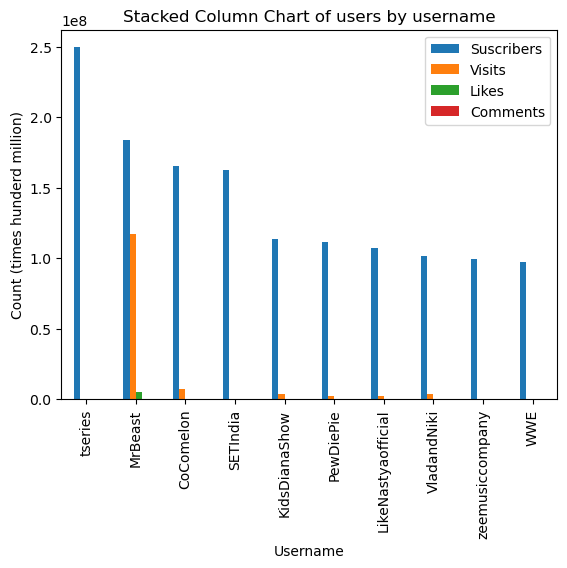

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a stacked column chart
needed = youtube_df[:10]
needed.plot(kind='bar', x='Username', y = ['Suscribers','Visits','Likes', 'Comments'], stacked=False)
plt.xlabel('Username')
plt.ylabel('Count (times hunderd million)')
plt.title('Stacked Column Chart of users by username')
plt.show()

#### Trends for Most Popular creators 
From the above chart which shows the top 10 content creators, it can be deduced that there is no trend as regards the amount of visits, likes and subscribers. This is not so clearly seen because the numbers are not on the same scale. So we normalize the figures in the chart that follows to have a better view of the figures using the function written above. The normalized figure is found below

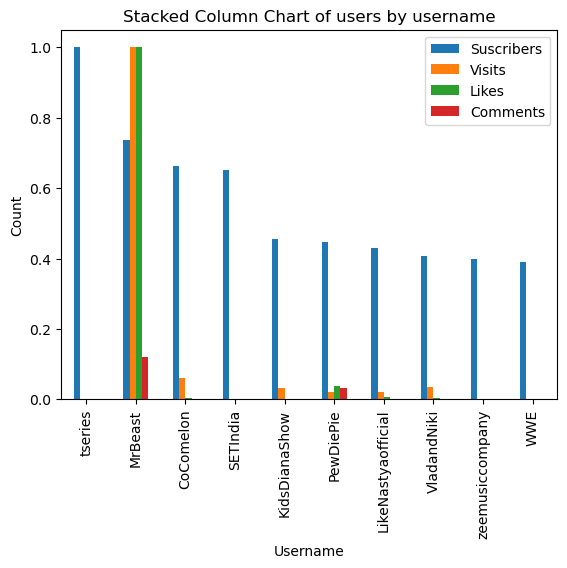

In [33]:
## group creators by count of subscribers 
import pandas as pd
import matplotlib.pyplot as plt

# Create a stacked column chart
needed = df_normalized[:10]
needed.plot(kind='bar', x='Username', y = ['Suscribers','Visits','Likes', 'Comments'], stacked=False)
plt.xlabel('Username')
plt.ylabel('Count')
plt.title('Stacked Column Chart of users by username')
plt.show()

In [34]:
# Group the DataFrame by 'country' and aggregate the 'subscriber' column by summing
grouped_df1 = youtube_df.groupby(['Country'])['Suscribers'].sum()
grouped_df1

Country
Arabia Saudita    7.460000e+07
Argelia           3.150000e+07
Argentina         1.241000e+08
Bangladesh        5.520000e+07
Brasil            1.246900e+09
Colombia          3.354000e+08
Ecuador           2.680000e+07
Egipto            6.990000e+07
El Salvador       2.190000e+07
España            6.460000e+07
Estados Unidos    6.266600e+09
Filipinas         2.610000e+08
Francia           8.590000e+07
India             5.823700e+09
Indonesia         7.525000e+08
Iraq              7.870000e+07
Japón             5.400000e+07
Jordania          1.420000e+07
Marruecos         2.580000e+07
México            1.151900e+09
Pakistán          2.318000e+08
Perú              3.140000e+07
Reino Unido       5.320000e+07
Rusia             4.264000e+08
Singapur          1.240000e+07
Somalia           1.170000e+07
Tailandia         3.602000e+08
Turquía           7.220000e+07
Unknown           4.129900e+09
Name: Suscribers, dtype: float64

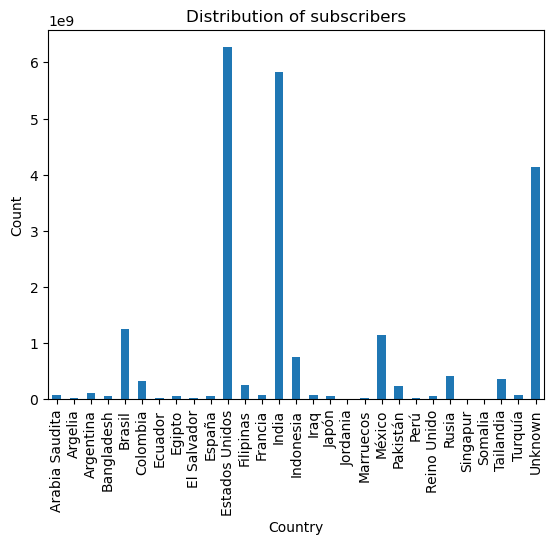

In [35]:
# category_count_sliced = category_count[:10] ## plot only top 10 categories
grouped_df1.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of subscribers')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

plt.show()

#### Subsribers by country
The chart above shows the distribution of subsribers by country and it can be seen that the country with the highest number of suscribers is 'Estados Unidos' (which is Spanish for United States of America).

In [36]:
# Group by 'Category' and compute total views, likers, and subscribers
category_stats = youtube_df.groupby('Categories').agg({
    'Visits': 'sum',
    'Likes': 'sum',
    'Suscribers': 'sum',
    'Comments': 'sum'
}).reset_index()

# Sort DataFrame by total views in descending order
category_stats = category_stats.sort_values(by='Visits', ascending=False)

# Display the results
print(category_stats)


                            Categories       Visits       Likes    Suscribers  \
29                      Música y baile  429102015.5  19306824.0  1.063190e+10   
42                  Videojuegos, Humor  174074500.0   7148700.0  4.890000e+08   
44                       Vlogs diarios  126330500.0   6928063.0  6.549000e+08   
3                     Animación, Humor  101523400.0   3935745.0  5.612000e+08   
6               Animación, Videojuegos   40802000.0   2695997.0  6.594000e+08   
36                Películas, Animación   33631100.0   1565932.0  1.384300e+09   
11                     Comida y bebida   32669400.0   1543977.0  1.935000e+08   
37                    Películas, Humor   31916600.0   1383277.0  6.221000e+08   
20                           Educación   26545000.0   1081458.0  6.003000e+08   
41                         Videojuegos   26355600.0   1085300.0  4.747000e+08   
24                               Humor   23104000.0   1699900.0  1.525000e+08   
35                          

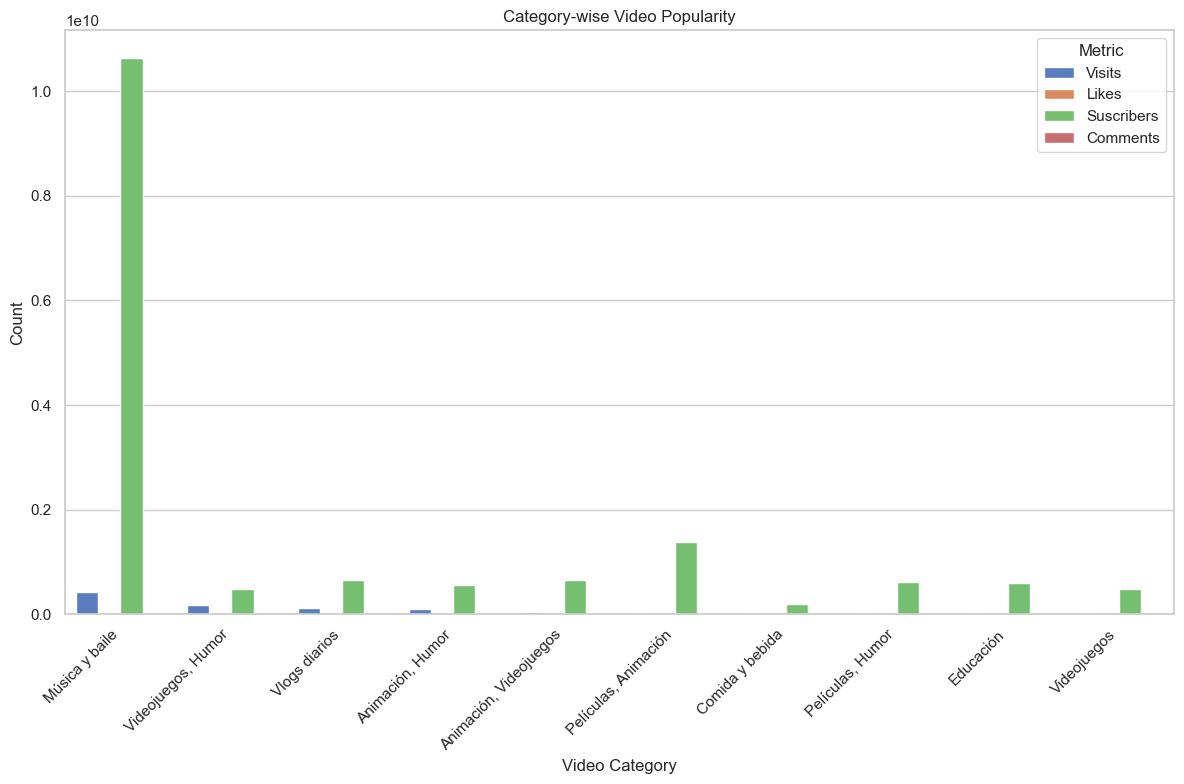

In [37]:
# Assuming you have the 'category_stats' DataFrame from the previous code

# Melt the DataFrame to make it suitable for a clustered column chart
melted_df = pd.melt(category_stats[:10], id_vars='Categories', var_name='Metric', value_name='Count')

# Plotting using seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Clustered column chart
sns.barplot(x='Categories', y='Count', hue='Metric', data=melted_df, palette="muted")

# Adding labels and title
plt.xlabel('Video Category')
plt.ylabel('Count')
plt.title('Category-wise Video Popularity')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


In [38]:
## use the function for normalization above 

df_normalized1 = normalize_df(category_stats.copy())

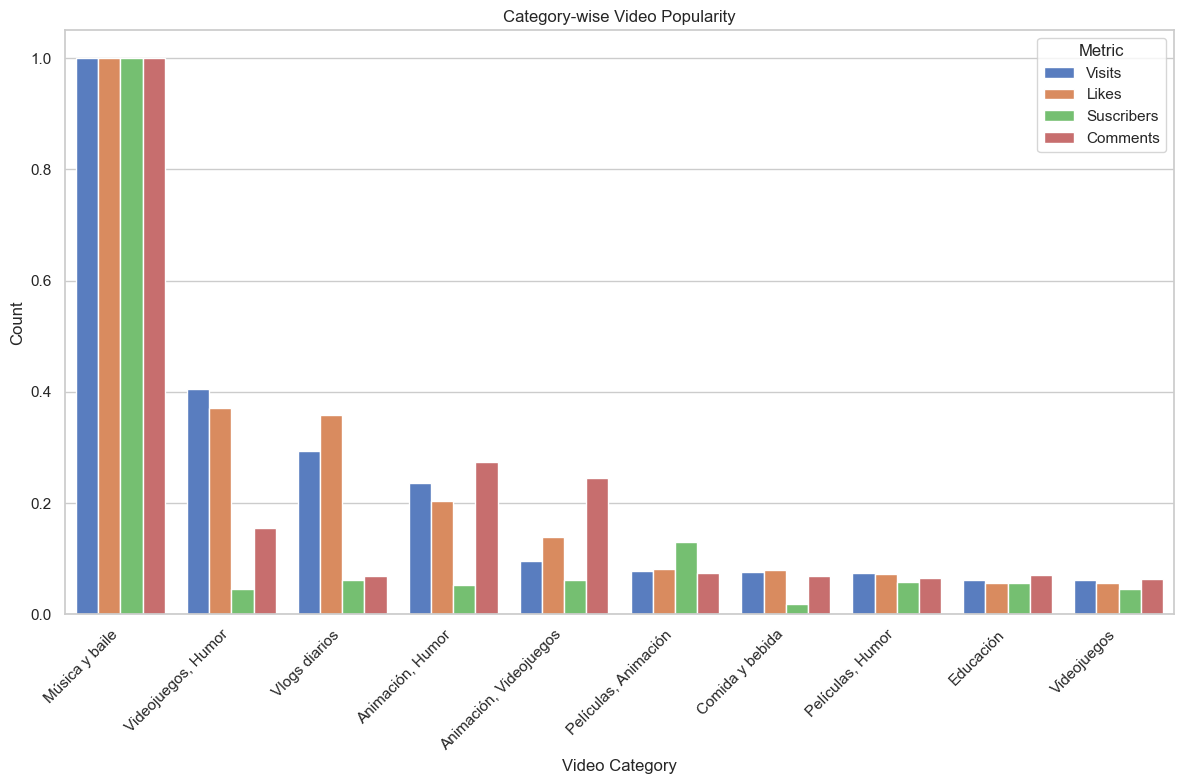

In [39]:
melted_df = pd.melt(df_normalized1[:10], id_vars='Categories', var_name='Metric', value_name='Count')

# Plotting using seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Clustered column chart
sns.barplot(x='Categories', y='Count', hue='Metric', data=melted_df, palette="muted")

# Adding labels and title
plt.xlabel('Video Category')
plt.ylabel('Count')
plt.title('Category-wise Video Popularity')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

From the chart above, it is seen that the 'Musica y Baile' category(Music and dance) has the combine highest number of visits, likes, subscribers and views among all other categories so this means thats this is the category that attracts the most number of individuals.

In [40]:
# Group by 'Category' and compute total views, likers, and subscribers
country_stats_country = youtube_df.groupby('Country').agg({
    'Visits': 'sum',
    'Likes': 'sum',
    'Suscribers': 'sum',
    'Comments': 'sum'
}).reset_index()

# Sort DataFrame by total views in descending order
country_stats_country = country_stats_country.sort_values(by='Visits', ascending=False)

# Display the results
print(country_stats_country)


           Country       Visits       Likes    Suscribers  Comments
10  Estados Unidos  618549260.0  27481754.0  6.266600e+09  614890.0
13           India  263282855.5  12738437.0  5.823700e+09  243270.0
28         Unknown   76549900.0    505765.0  4.129900e+09    1400.0
19          México   61966100.0   3762175.0  1.151900e+09   69959.0
23           Rusia   42040300.0   2029692.0  4.264000e+08   75122.0
4           Brasil   26820400.0   1729333.0  1.246900e+09  183687.0
14       Indonesia   20344100.0    741917.0  7.525000e+08   22093.0
5         Colombia   14566800.0    895029.0  3.354000e+08    5941.0
2        Argentina   14474200.0    930853.0  1.241000e+08    7468.0
8      El Salvador   12900000.0    707600.0  2.190000e+07    2100.0
11       Filipinas    9323200.0    329029.0  2.610000e+08   13293.0
22     Reino Unido    9250700.0    285602.0  5.320000e+07    8233.0
15            Iraq    6326700.0    562400.0  7.870000e+07   20559.0
12         Francia    6059100.0    119037.0  8.5

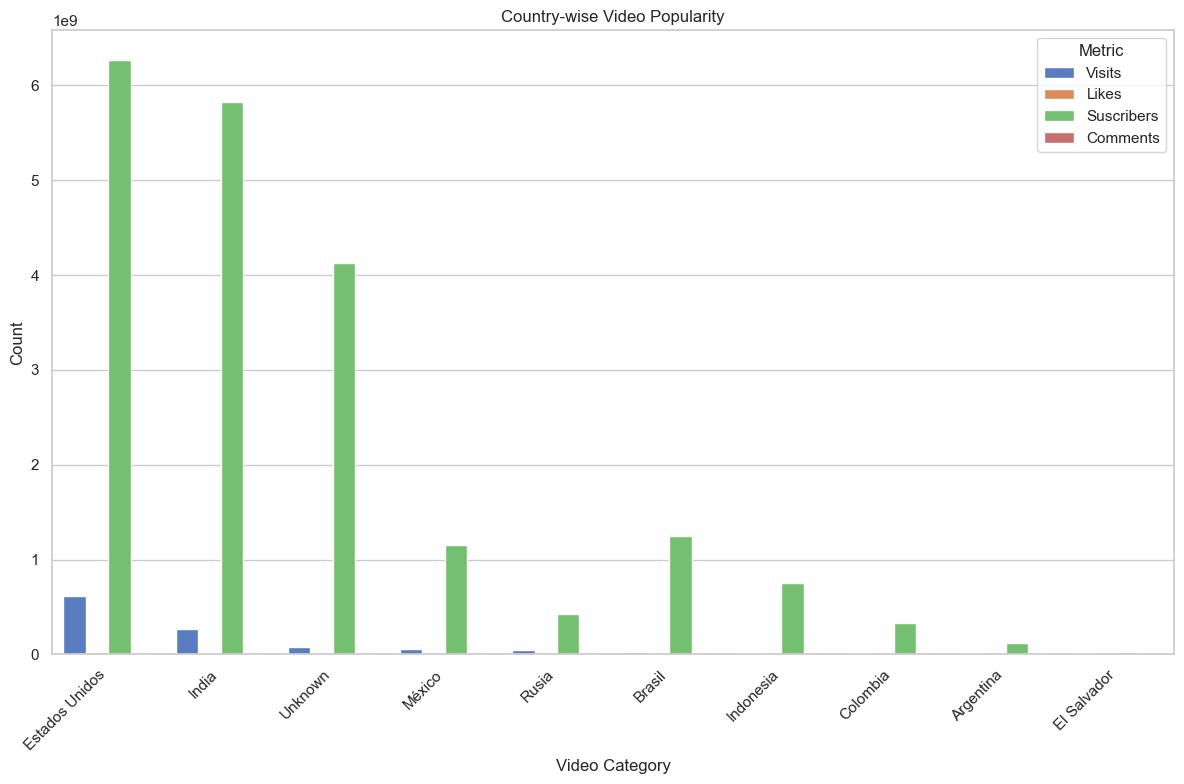

In [41]:
## no normalization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the 'category_stats_country' DataFrame from the previous code

# Melt the DataFrame to make it suitable for a clustered column chart
melted_df1 = pd.melt(country_stats_country[:10], id_vars='Country', var_name='Metric', value_name='Count')

# Plotting using seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Clustered column chart
sns.barplot(x='Country', y='Count', hue='Metric', data=melted_df1, palette="muted")

# Adding labels and title
plt.xlabel('Video Category')
plt.ylabel('Count')
plt.title('Country-wise Video Popularity')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [42]:
## using normalized data 
df_normalized_country = normalize_df(country_stats_country.copy())

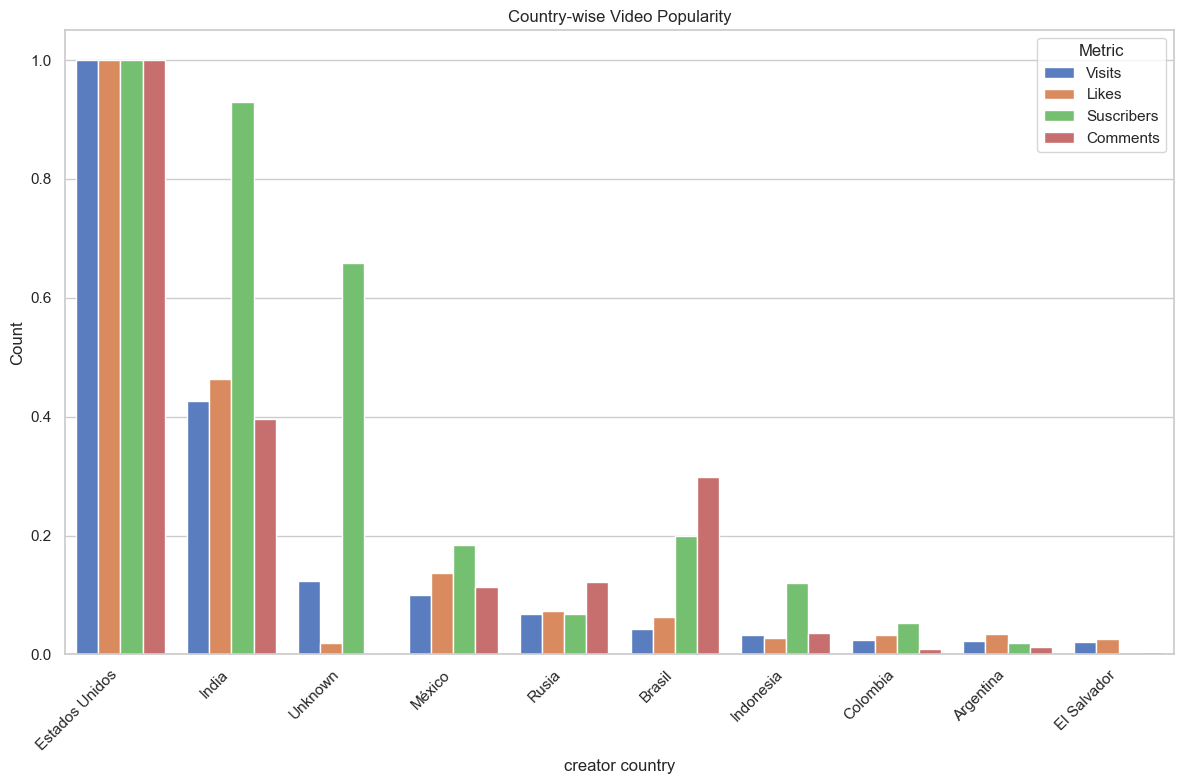

In [43]:
## using normalized data 
# Melt the DataFrame to make it suitable for a clustered column chart
melted_df2 = pd.melt(df_normalized_country[:10], id_vars='Country', var_name='Metric', value_name='Count')

# Plotting using seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Clustered column chart
sns.barplot(x='Country', y='Count', hue='Metric', data=melted_df2, palette="muted")

# Adding labels and title
plt.xlabel('creator country')
plt.ylabel('Count')
plt.title('Country-wise Video Popularity')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

The chart above shows that Estados Unidos (United States) has the highest number of views, subscribers, likes and comments. This shows that the country has the highest number of users interacting with the content creators. 

### Recommendation

* Content creators with high number of subscribers can also be recommended to users.
* Categories with high number of subscribers and views like the 'music and dance' can be recommended to new users and other categories with high metrics too. 
* Adverts can be targetted at the audience in those countries with high numbers of subscribers and views and likes also. 